## Generalidades del notebook
<ul>
    <li>
    <b>Proyecto:</b> Predicción de accidentes cerebrovasculares
    </li> 
    <li>
    <b>Objetivo del notebook:</b> Preparación de datos y modelo de prediccón
    </li> 
    <li>
    <b>Autores:</b> 
        <ul>
            <li>Augusto Trilleras Motta</li>
            <li>Lizeth Rodriguez Ramos</li>
        </ul>
    </li>
    <li>
    <b>Fecha:</b> Abril, 2023
    </li>
</ul>    

In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## **Exploracion de los Datos**
<p>
La base de datos healthcare-dataset-stroke se utiliza para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de los datos proporciona información relevante sobre el paciente.
</p>

#### Parámetros
<ul>
    <li>
        <b>id:</b> Identificador único
    </li>    
    <li>    
        <b>gender:</b> "Masculino", "Femenino" u "Otro"
    </li>    
    <li>    
        <b>age:</b> Edad del paciente
    </li>    
    <li>    
        <b>hypertension:</b> 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión
    </li>    
    <li>    
        <b>heart_disease:</b> 0 si el paciente no tiene ninguna enfermedad del corazón, 1 si el paciente tiene una enfermedad del corazón
    </li>    
    <li>    
        <b>ever_married:</b> "No" o "Sí"
    </li>    
    <li>    
        <b>work_type:</b> "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
    </li>    
    <li>    
        <b>Residence_type:</b> "Rural" o "Urban"
    </li>    
    <li>    
        <b>avg_glucose_level:</b> Nivel promedio de glucosa en sangre
    </li>    
    <li>    
        <b>bmi:</b> Índice de masa corporal
    </li>    
    <li> 
        <b>smoking_status:</b> "formerly smoked", "never smoked", "smokes" or "Unknown"
    </li>
    <li> 
        <b>stroke:</b> 1 si el paciente tuvo un accidente cerebrovascular o 0 en caso contrario
    </li>
</ul>


In [174]:
df = pd.read_csv('../Dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [175]:
# nombres de las columnas
print(f'Columnas y dimensiones: {df.columns}, {df.shape}')

Columnas y dimensiones: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object'), (5110, 12)


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [177]:
df['bmi'].fillna((df['bmi'].mean()), inplace=True)
df = df.drop(['id'], axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [178]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [179]:
outlier = ['avg_glucose_level', 'bmi']

Q1 = df[outlier].quantile(0.25)
Q3 = df[outlier].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[outlier]<(Q1-1.5*IQR))|(df[outlier]>(Q3+1.5*IQR))).any(axis=1)]
df.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
3,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
4,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
4386,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
4387,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
4388,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
4389,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


C:\Users\Liz\AppData\Local\Temp\ipykernel_7256\3997962454.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


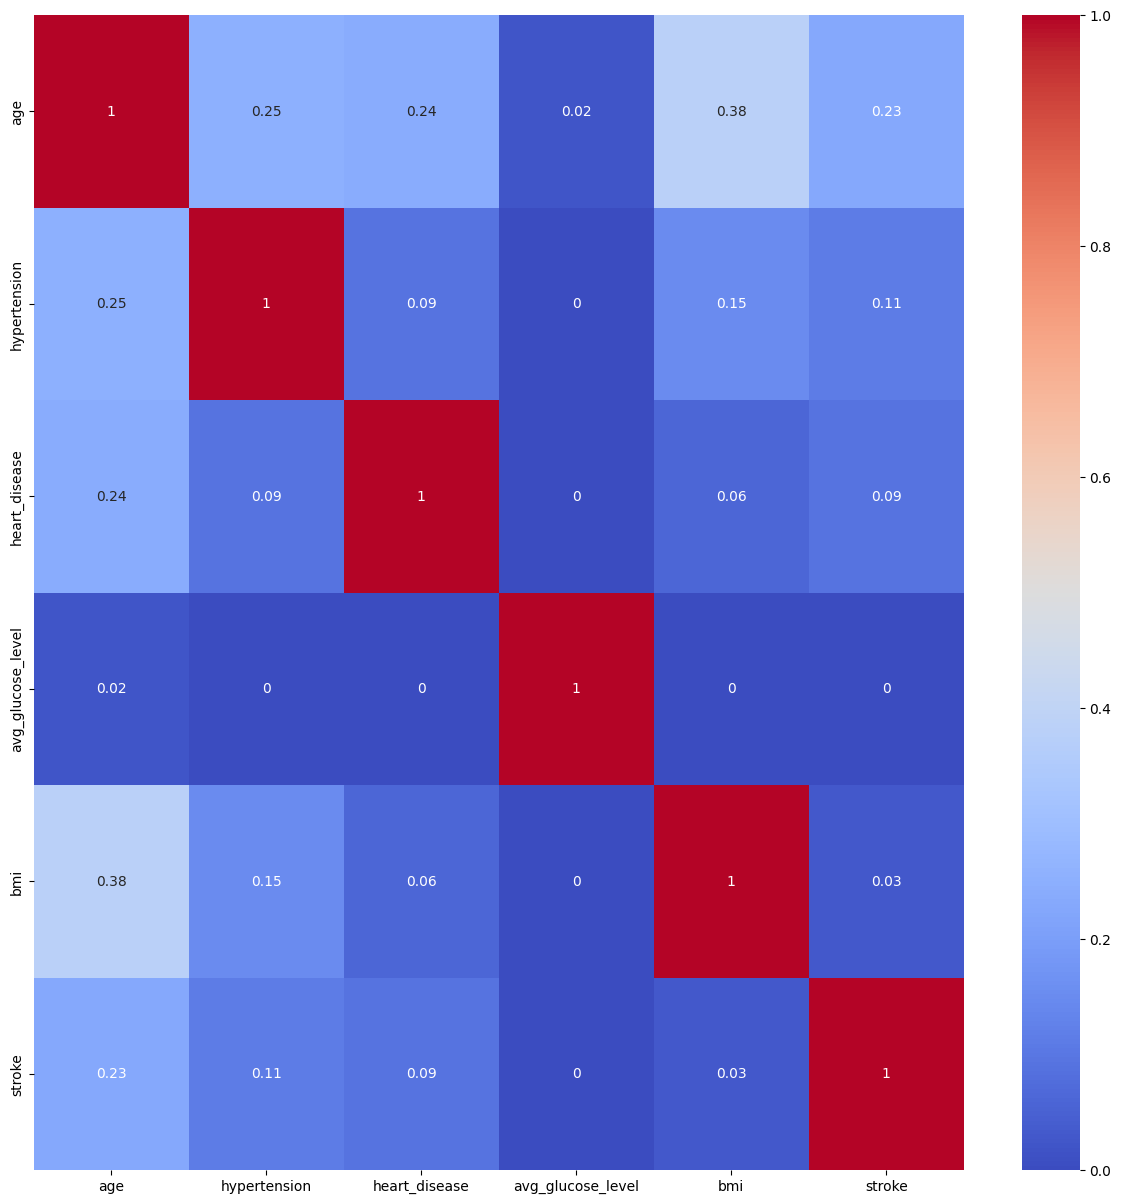

In [180]:
corr = df.corr()
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
sns.heatmap(round(corr,2).abs(), annot=True, cmap="coolwarm", ax=ax); 

In [181]:
#	bmi	smoking_status	stroke
print(
    f'''
    Genero: {df['gender'].unique().tolist()}
    Casado: {df['ever_married'].unique().tolist()}
    Tipo de trabajo: {df['work_type'].unique().tolist()}
    Tipo de residencia: {df['Residence_type'].unique().tolist()}
    Estado de fumador: {df['smoking_status'].unique().tolist()}
    '''
)


    Genero: ['Male', 'Female', 'Other']
    Casado: ['Yes', 'No']
    Tipo de trabajo: ['Private', 'Govt_job', 'Self-employed', 'children', 'Never_worked']
    Tipo de residencia: ['Rural', 'Urban']
    Estado de fumador: ['never smoked', 'Unknown', 'smokes', 'formerly smoked']
    


In [182]:
# df.gender = df.gender.astype("category").cat.codes
# df.ever_married = df.ever_married.astype("category").cat.codes
# df.work_type = df.work_type.astype("category").cat.codes
# df.Residence_type = df.Residence_type.astype("category").cat.codes
# df.smoking_status = df.smoking_status.astype("category").cat.codes

# df.head()

<ul>
    <li>
        <b>Género:</b> 
        0 Male | 1 Female | 2 Other
    </li> 
    <li>
        <b>Casado:</b> 
        0 No | 1 Yes
    </li>     
    <li>
        <b>Tipo de trabajo:</b> 
        0 Children | 1 Never_worked | 2 Private | 3 Self-employed | 4 Govt_job 
    </li>  
    <li>
        <b>Tipo de residencia:</b> 
        0 Rural | 1 Urban
    </li>  
    <li>
        <b>Estado de fumador:</b> 
        0 Unknown | 1 formerly smoked | 2 never smoked | 3 smokes
    </li>  
</ul>


In [183]:
df = pd.get_dummies(df)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
6,74.0,1,1,70.09,27.400000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
7,69.0,0,0,94.39,22.800000,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
8,59.0,0,0,76.15,28.893237,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
9,78.0,0,0,58.57,24.200000,1,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4391 entries, 2 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4391 non-null   float64
 1   hypertension                    4391 non-null   int64  
 2   heart_disease                   4391 non-null   int64  
 3   avg_glucose_level               4391 non-null   float64
 4   bmi                             4391 non-null   float64
 5   stroke                          4391 non-null   int64  
 6   gender_Female                   4391 non-null   uint8  
 7   gender_Male                     4391 non-null   uint8  
 8   gender_Other                    4391 non-null   uint8  
 9   ever_married_No                 4391 non-null   uint8  
 10  ever_married_Yes                4391 non-null   uint8  
 11  work_type_Govt_job              4391 non-null   uint8  
 12  work_type_Never_worked          43

### Modelos

In [192]:
X = df.drop(['stroke'], axis=1)
X = pd.DataFrame(StandardScaler().fit_transform(X))
y = df.stroke

sm = SMOTE(random_state=111)
X_sm , y_sm = sm.fit_resample(X,y)

x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=100)

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

##### a. Regresión logística

In [193]:
logisticRModel = LogisticRegression(random_state=0)
logisticRModel.fit(x_train, y_train)
y_pred = logisticRModel.predict(x_test)

Text(0.5, 269.55555555555554, 'Predicted label')

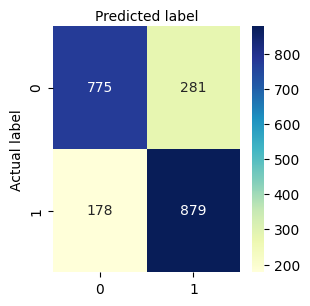

In [194]:
cnf_matrix = confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(3,3))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
# plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [195]:
logistic_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(logistic_report).transpose()

,precision,recall,f1-score,support
No Stroke,0.813221,0.733902,0.771528,1056.000000
Stroke,0.757759,0.831599,0.792963,1057.000000
accuracy,0.782773,0.782773,0.782773,0.782773
macro avg,0.785490,0.782750,0.782246,2113.000000
weighted avg,0.785477,0.782773,0.782251,2113.000000


##### b. K-Neighbors

In [196]:
KNeighborsModel = KNeighborsClassifier(n_neighbors=2)
KNeighborsModel.fit(x_train, y_train)
y_pred = KNeighborsModel.predict(x_test)

In [197]:
KNeighbors_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(KNeighbors_report).transpose()

,precision,recall,f1-score,support
No Stroke,0.957760,0.923295,0.940212,1056.000000
Stroke,0.926027,0.959319,0.942379,1057.000000
accuracy,0.941316,0.941316,0.941316,0.941316
macro avg,0.941894,0.941307,0.941296,2113.000000
weighted avg,0.941886,0.941316,0.941296,2113.000000


##### c. RandomForestClassifier

In [200]:
RandomForestModel = RandomForestClassifier(max_depth=6, random_state=0)
RandomForestModel.fit(x_train, y_train)
y_pred = RandomForestModel.predict(x_test)
RandomForest_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(RandomForest_report).transpose()

,precision,recall,f1-score,support
No Stroke,0.975089,0.518939,0.677379,1056.000000
Stroke,0.672469,0.986755,0.799847,1057.000000
accuracy,0.752958,0.752958,0.752958,0.752958
macro avg,0.823779,0.752847,0.738613,2113.000000
weighted avg,0.823708,0.752958,0.738642,2113.000000


##### d. SVM

In [201]:
svmModel = SVC(gamma='auto')
svmModel.fit(x_train, y_train)
y_pred = svmModel.predict(x_test)
svm_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(svm_report).transpose()

,precision,recall,f1-score,support
No Stroke,0.959341,0.826705,0.888098,1056.000000
Stroke,0.847880,0.964995,0.902655,1057.000000
accuracy,0.895883,0.895883,0.895883,0.895883
macro avg,0.903610,0.895850,0.895376,2113.000000
weighted avg,0.903584,0.895883,0.895380,2113.000000
